In [4]:
import pandas as pd

In [5]:
import numpy as np

In [27]:
import matplotlib.pyplot as plt

In [28]:
%matplotlib inline

In [7]:
monstri = pd.read_csv('monstri.csv', index_col = 'Ime')

In [8]:
pd.options.display.max_rows = 14

In [9]:
#tabela zajetih podatkov
monstri

,Atribut,Level_Rank,Tip,ATK,DEF
Ime,,,,,
Armityle the Chaos Phantom,DARK,12,Fiend,0,0
Assault Blackwing - Onimaru the Divine Thunder,DARK,12,Winged Beast,3000,2000
"Barbaroid, the Ultimate Battle Machine",EARTH,12,Machine,4000,4000
Blue-Eyes Ultimate Dragon,LIGHT,12,Dragon,4500,3800
Cosmic Blazar Dragon,WIND,12,Dragon,4000,4000
Dragon Master Knight,LIGHT,12,Dragon,5000,5000
Dystopia the Despondent,DARK,12,Fiend,5000,5000
...,...,...,...,...,...
Unknown Synchron,DARK,1,Machine,0,0


In [10]:
monstri_po_atributu = monstri.groupby('Atribut')

In [37]:
#zastopanost posameznih atributov
monstri_po_atributu.size().sort_values(ascending = False)

Atribut
DARK      1399
EARTH     1335
LIGHT     1073
WATER      532
WIND       502
FIRE       454
DIVINE       5
dtype: int64

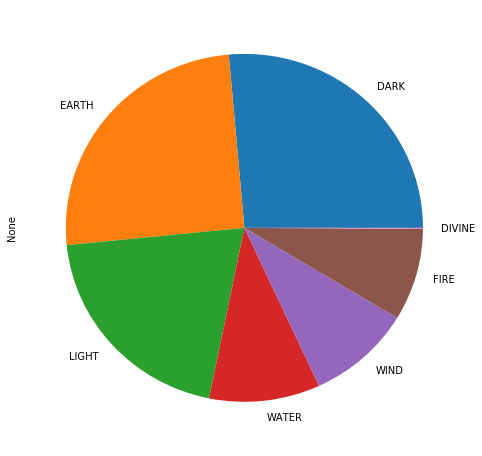

In [71]:
monstri_po_atributu.size().sort_values(ascending = False).plot(kind='pie', figsize=(8,8))

In [12]:
#povprečni level/rank za posamezni atribut
monstri_po_atributu['Level_Rank'].mean().sort_values(ascending = False)

Atribut
DIVINE    10.000000
DARK       4.792709
LIGHT      4.738117
FIRE       4.537445
WIND       4.268924
EARTH      4.222472
WATER      4.204887
Name: Level_Rank, dtype: float64

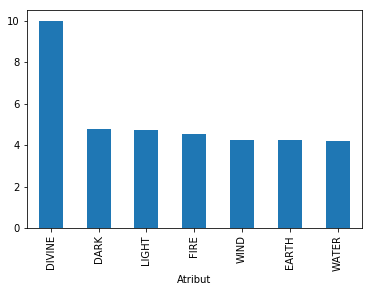

In [39]:
monstri_po_atributu['Level_Rank'].mean().sort_values(ascending = False).plot(kind='bar')

In [13]:
monstri_po_tipu = monstri.groupby('Tip')

In [14]:
pd.options.display.max_rows = None

In [15]:
#zastopanost posameznih tipov
monstri_po_tipu.size().sort_values(ascending = False)

Tip
Warrior          750
Machine          644
Fiend            529
Spellcaster      453
Dragon           413
Fairy            305
Beast            276
Winged Beast     236
Rock             181
Beast-Warrior    172
Aqua             168
Insect           165
Plant            154
Zombie           141
Reptile          121
Pyro             108
Psychic          107
Fish              92
Thunder           91
Dinosaur          84
Sea Serpent       58
Wyrm              43
Divine-Beast       5
Cyberse            4
dtype: int64

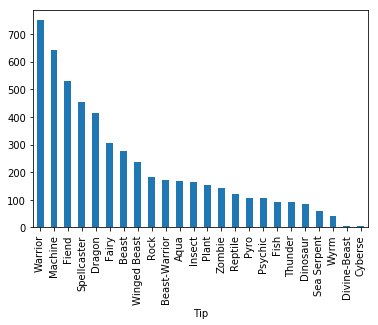

In [61]:
monstri_po_tipu.size().sort_values(ascending = False).plot(kind='bar')

In [16]:
#povprečni level/rank za posamezni tip
monstri_po_tipu['Level_Rank'].mean().sort_values(ascending = False)

Tip
Divine-Beast     10.000000
Dragon            6.111380
Wyrm              5.534884
Fairy             4.793443
Dinosaur          4.750000
Machine           4.690994
Warrior           4.684000
Beast-Warrior     4.546512
Fiend             4.478261
Zombie            4.347518
Rock              4.331492
Thunder           4.296703
Pyro              4.268519
Winged Beast      4.250000
Reptile           4.247934
Sea Serpent       4.241379
Psychic           4.196262
Spellcaster       4.055188
Fish              3.945652
Beast             3.887681
Aqua              3.809524
Insect            3.793939
Plant             3.532468
Cyberse           3.500000
Name: Level_Rank, dtype: float64

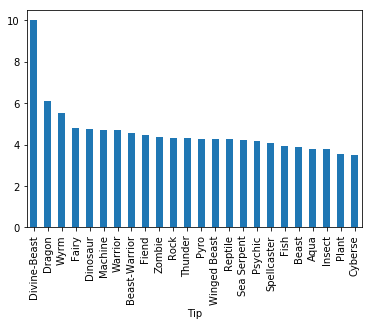

In [62]:
#povprečni level/rank za posamezni tip
monstri_po_tipu['Level_Rank'].mean().sort_values(ascending = False).plot(kind='bar')

In [17]:
pd.options.display.max_rows = 14

In [18]:
monstri_po_levelu = monstri.groupby('Level_Rank')

In [19]:
#povprečni napad pošasti določenega levela/ranka
monstri_po_levelu['ATK'].mean().sort_values(ascending = False)

Level_Rank
12    3321.428571
9     2683.750000
11    2653.333333
10    2601.265823
8     2543.493976
7     2320.253165
6     2034.157303
5     1801.452381
4     1433.445522
3      956.250000
2      573.946785
1      222.823219
Name: ATK, dtype: float64

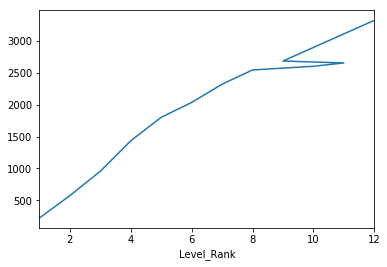

In [56]:
monstri_po_levelu['ATK'].mean().sort_values(ascending = False).plot().invert_xaxis()

In [20]:
#povprečna obramba pošasti določenega levela/ranka
monstri_po_levelu['DEF'].mean().sort_values(ascending = False)

Level_Rank
12    3189.285714
11    2443.333333
9     2277.500000
10    2006.962025
8     1975.783133
7     1847.468354
6     1527.483146
5     1428.547619
4     1154.095836
3      945.178571
2      609.201774
1      321.108179
Name: DEF, dtype: float64

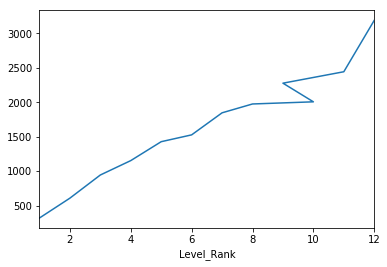

In [70]:
monstri_po_levelu['DEF'].mean().sort_values(ascending = False).plot().invert_xaxis()

In [21]:
#izračuna število tributov, potrebnih za priklic pošasti: 0 za levele 1-4, 1 za levela 5 in 6 ter 2 za levele, višje od 6
def stevilo_tributov(): 
    stevilo = np.where(monstri['Level_Rank'] <= 4, 0,np.where(monstri['Level_Rank'] >= 7, 2, 1))
    return stevilo

#dodal novi stolpec v tabelo
monstri['Stevilo_tributov'] = stevilo_tributov()

#nova tabela z dodanim stolpcem
monstri

,Atribut,Level_Rank,Tip,ATK,DEF,Stevilo_tributov
Ime,,,,,,
Armityle the Chaos Phantom,DARK,12,Fiend,0,0,2
Assault Blackwing - Onimaru the Divine Thunder,DARK,12,Winged Beast,3000,2000,2
"Barbaroid, the Ultimate Battle Machine",EARTH,12,Machine,4000,4000,2
Blue-Eyes Ultimate Dragon,LIGHT,12,Dragon,4500,3800,2
Cosmic Blazar Dragon,WIND,12,Dragon,4000,4000,2
Dragon Master Knight,LIGHT,12,Dragon,5000,5000,2
Dystopia the Despondent,DARK,12,Fiend,5000,5000,2
...,...,...,...,...,...,...
Unknown Synchron,DARK,1,Machine,0,0,0


In [22]:
monstri_po_tributih = monstri.groupby('Stevilo_tributov')

#preštel, koliko pošasti pripada posamezni kategoriji glede na število potrebnih tributov
monstri_po_tributih.size()

Stevilo_tributov
0    3423
1     865
2    1012
dtype: int64

In [23]:
monstri_po_tirbutih_in_napadu = monstri.sort_values(by=['Stevilo_tributov', 'ATK'], ascending = False)

In [24]:
#10 pošasti z najvišjim napadom, ki ne potrebujejo tributov za priklic
monstri_po_tirbutih_in_napadu[monstri_po_tirbutih_in_napadu.Stevilo_tributov == 0].head(10)

,Atribut,Level_Rank,Tip,ATK,DEF,Stevilo_tributov
Ime,,,,,,
Number 85: Crazy Box,DARK,4,Fiend,3000,300,0
Number 30: Acid Golem of Destruction,WATER,3,Rock,3000,3000,0
Gagagigo the Risen,WATER,4,Reptile,2950,2950,0
Number 32: Shark Drake,WATER,4,Sea Serpent,2800,2100,0
Number C32: Shark Drake Veiss,WATER,4,Sea Serpent,2800,2800,0
Evilswarm Ouroboros,DARK,4,Dragon,2750,1950,0
Number 104: Masquerade,LIGHT,4,Spellcaster,2700,1200,0
Bahamut Shark,WATER,4,Sea Serpent,2600,2100,0
Bujinki Amaterasu,LIGHT,4,Beast-Warrior,2600,2500,0


In [25]:
#10 pošasti z najvišjim napadom, ki potrebujejo 1 tribut za priklic
monstri_po_tirbutih_in_napadu[monstri_po_tirbutih_in_napadu.Stevilo_tributov == 1].head(10)

,Atribut,Level_Rank,Tip,ATK,DEF,Stevilo_tributov
Ime,,,,,,
Number C69: Heraldry Crest of Horror,LIGHT,5,Psychic,4000,1800,1
"Digvorzhak, King of Heavy Industry",EARTH,5,Machine,3200,2000,1
Number 39: Utopia Beyond,LIGHT,6,Warrior,3000,2500,1
Number C73: Abyss Supra Splash,WATER,6,Warrior,3000,2000,1
CXyz Comics Hero Legend Arthur,EARTH,5,Warrior,3000,2400,1
Dark Requiem Xyz Dragon,DARK,5,Dragon,3000,2500,1
Number C104: Umbral Horror Masquerade,DARK,5,Spellcaster,3000,1500,1
ZW - Leo Arms,LIGHT,5,Beast,3000,1200,1
Number C102: Archfiend Seraph,LIGHT,5,Fairy,2900,2400,1


In [26]:
#10 pošasti z najvišjim napadom, ki potrebujejo 2 tributa za priklic
monstri_po_tirbutih_in_napadu[monstri_po_tirbutih_in_napadu.Stevilo_tributov == 2].head(10)

,Atribut,Level_Rank,Tip,ATK,DEF,Stevilo_tributov
Ime,,,,,,
Dragon Master Knight,LIGHT,12,Dragon,5000,5000,2
Dystopia the Despondent,DARK,12,Fiend,5000,5000,2
Five-Headed Dragon,DARK,12,Dragon,5000,5000,2
Malefic Truth Dragon,DARK,12,Dragon,5000,5000,2
Flower Cardian Lightflare,DARK,10,Warrior,5000,0,2
Rocket Arrow Express,EARTH,10,Machine,5000,0,2
Superdimensional Robot Galaxy Destroyer,LIGHT,10,Machine,5000,2000,2
Machina Force,EARTH,10,Machine,4600,4100,2
Blue-Eyes Ultimate Dragon,LIGHT,12,Dragon,4500,3800,2
